## Important Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Starting the Chrome Driver Session

In [2]:
driver = webdriver.Chrome(executable_path = 'c:Downloads/chromedriver.exe')
driver.get('https://www.instagram.com/')
driver.maximize_window()

## Entering the Login Credentials

In [3]:
wait = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'f0n8F ')))
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')
username.send_keys('SAMPLE USERNAME')
password.send_keys('SAMPLE PASSWORD')
password.submit()

## Supressing the Save info and Notification Window

In [4]:
save_info = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'cmbtv')))
save_info.click()
notification = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"HoLwm")))
notification.click()

## Enabling the Search box by clicking on it

In [5]:
search_wait = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'eyXLr ')))
search_box = driver.find_element_by_class_name('TqC_a').click()

## Searching for food in the search box

In [6]:
search_box = driver.find_element_by_class_name('XTCLo ')
search_box.send_keys('food')
wait=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"-qQT3")]//div[contains(@class,"_7UhW9")]/div/div')))

In [7]:
food_list = []
for i in driver.find_elements_by_xpath('//a[contains(@class,"-qQT3")]//div[contains(@class,"_7UhW9")]/div/div'):
    name = i.get_attribute('innerHTML')
    if 'span' not in name:
        food_list.append(name)

## Printing Top 10 Profiles 

In [8]:
food_list.remove('food')
food_list = food_list[0:10]
food_list

['dilsefoodie',
 'delhifoodguide',
 'foodie__planet',
 'delhifoodwalks',
 'delhi_street_food1',
 'yourfoodlab',
 'street_food_chandigarh',
 'streetfooderss',
 'thefoodranger',
 'foodie_incarnate']

## Function for Converting the followers from string to int

In [9]:
def get_followers(num):
    if 'k' in num:
        new_num = int(round(float(num[:-1])*1000,2))
    elif 'm' in num:
        new_num = int(round(float(num[:-1])*1000000,2))
    else:
        new_num = int("".join(num.split(',')))
    return new_num

In [10]:
clear_search = driver.find_element_by_class_name('coreSpriteSearchClear')
clear_search.click()

## Storing the followers of top 10 profiles

In [11]:
followers_list = []
for profile in food_list:
    driver.find_element_by_class_name('TqC_a').click()
    driver.find_element_by_class_name('XTCLo ').send_keys(profile)
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"fuqBx")))
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"-qQT3")]/div/div/div')))
    driver.find_element_by_xpath('//div[contains(@class,"fuqBx")]/div').click()
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,'Nnq7C')))
    num = driver.find_elements_by_class_name('g47SY')[1].get_attribute('innerHTML')
    followers = get_followers(num)
    followers_list.append(followers)

## Printing Top 5 Profiles having maximum followers amongst the top 10 profiles

In [12]:
index = np.argsort(followers_list)
top5 = []
top5_followers = []
for i in index[-1:-6:-1]:
    top5.append(food_list[i])
    top5_followers.append(followers_list[i])
    print(food_list[i])

yourfoodlab
thefoodranger
dilsefoodie
foodie_incarnate
delhifoodwalks


## Printing and Storing the number of posts of Top 5 users having maximum followers that have been posted in last 3 days

In [13]:
Num_posts = []
for user in top5:
    driver.find_element_by_class_name('TqC_a').click()
    driver.find_element_by_class_name('XTCLo ').send_keys(user)
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"-qQT3")]//div[contains(@class,"_7UhW9")]/div/div')))
    driver.find_element_by_xpath('//div[contains(@class,"fuqBx")]/div').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,'Nnq7C')))
    driver.find_element_by_xpath('//div[contains(@class,"Nnq7C")]/div').click() # Recent Post
    count = 0 # post Counter
    while True:
        time.sleep(3)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//section[contains(@class,"ltpMr")]//div[contains(@class,"QBdPU")]')))
        post_time = driver.find_element_by_xpath('//div[contains(@class,"NnvRN")]/a/time').get_attribute('innerHTML')
        time_array = post_time.split(' ')
        if time_array[1][0] in ['m','s','h']:
            count += 1
        elif time_array[1][0] == 'd' and float(time_array[0]) <= 3:
            count += 1
        else:
            break
        driver.find_element_by_xpath('//div[contains(@class,"DdSX2")]/a[contains(@class,"coreSpriteRightPaginationArrow")]').click() # next post
    print(user ,' has Posted ',count,' posts in last 3 days')
    Num_posts.append(count)
    driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]').click()

yourfoodlab  has Posted  2  posts in last 3 days
thefoodranger  has Posted  1  posts in last 3 days
dilsefoodie  has Posted  4  posts in last 3 days
foodie_incarnate  has Posted  6  posts in last 3 days
delhifoodwalks  has Posted  5  posts in last 3 days


## Ploting the graphs for the above data

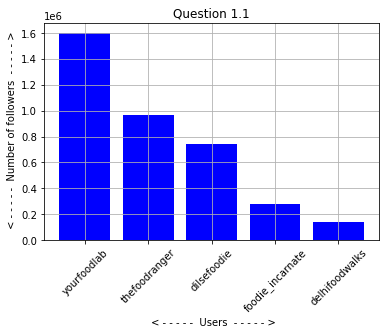

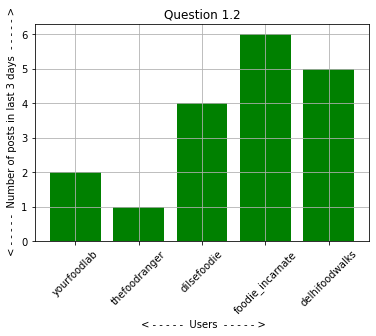

In [14]:
plt.bar(top5,top5_followers,color='blue')
plt.grid()
plt.xticks(rotation=45)
plt.title('Question 1.1')
plt.xlabel(' < - - - - -  Users  - - - - - >')
plt.ylabel(' < - - - - -  Number of followers  - - - - - >')
plt.show()

plt.bar(top5,Num_posts,color='g')
plt.grid()
plt.xticks(rotation=45)
plt.title('Question 1.2')
plt.xlabel(' < - - - - -  Users  - - - - - >')
plt.ylabel(' < - - - - -  Number of posts in last 3 days  - - - - - >')
plt.show()

## Scraping the caption and Hashtags used in the first 10 posts for top5 users and storing them in the list

In [15]:
content = []
hashtags = []
for user in top5:
    driver.find_element_by_class_name('TqC_a').click()
    driver.find_element_by_class_name('XTCLo ').send_keys(user)
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"-qQT3")]//div[contains(@class,"_7UhW9")]/div/div')))
    driver.find_element_by_xpath('//div[contains(@class,"fuqBx")]/div').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,'Nnq7C')))
    driver.find_element_by_xpath('//div[contains(@class,"Nnq7C")]/div').click() # Recent Post
    count = 10 # post Counter
    while count>0:
        try:
            time.sleep(3)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//section[contains(@class,"ltpMr")]//div[contains(@class,"QBdPU")]')))
            ## post has been opened , caption has to be scrapped
            content.append(driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').text)
            for h in driver.find_elements_by_xpath('//div[contains(@class,"C4VMK")]/span/a[contains(@class,"xil3i")]'):
                hashtags.append(h.text)
            driver.find_element_by_xpath('//div[contains(@class,"DdSX2")]/a[contains(@class,"coreSpriteRightPaginationArrow")]').click() # next post
            count -= 1
        except NoSuchElementException:
            break
    driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]').click()

## Printing captions of all posts

In [16]:
for i in content:
    print(i)
    print('--------------------------------------------------------------------------------------')

Mushroom Ghee Roast by Chef @sanjyotkeer

Mushroom Ghee roast is an amazing recipe and I absolutely love it. This is one is for the vegetarians, I had got a lot of recipe requests for this one.
You can replace the mushrooms with paneer, veggies or even meat if you are a non vegetarian. Some other versions are available in the channel as well so you can have a look. Do try the recipe and let me know! Cheers!
.
.
.
.
#recipeoftheday #recipevideo #gheeroast #foodphotography #foodporn #foodstagram #streetfood #foodlover #foodpics #streetfoodlover #indiancuisine
--------------------------------------------------------------------------------------
What’s up guys! New video is up on the YouTube & Facebook channel! Mushroom Ghee roast is an amazing recipe and I absolutely love it. This is one is for the vegetarians, I had got a lot of recipe requests for this one.
You can replace the mushrooms with paneer, veggies or even meat if you are a non vegetarian. Some other versions are available in 

## Printing Hashtags with its frequency

In [17]:
d = {}
for h in hashtags:
    d[h] = d.get(h,0)+1
d

{'#recipeoftheday': 6,
 '#recipevideo': 4,
 '#gheeroast': 2,
 '#foodphotography': 5,
 '#foodporn': 8,
 '#foodstagram': 4,
 '#streetfood': 8,
 '#foodlover': 6,
 '#foodpics': 2,
 '#streetfoodlover': 2,
 '#indiancuisine': 2,
 '#foodstylist': 2,
 '#foodiesofinstagram': 6,
 '#egg': 2,
 '#eggcurry': 2,
 '#eggs': 2,
 '#egglover': 2,
 '#goanrecipes': 2,
 '#goanfood': 2,
 '#sanjyotkeer': 6,
 '#yourfoodlab': 4,
 '#recipe': 4,
 '#burger': 2,
 '#burgerlove': 2,
 '#burgertime': 2,
 '#burgerlover': 2,
 '#vegburger': 2,
 '#vegrecipesofindia': 2,
 '#vegetarian': 2,
 '#rajma': 2,
 '#burgers': 2,
 '#YFLQuickies': 1,
 '#reelitfeelit': 2,
 '#reelsinstagram': 2,
 '#reelsvideo': 2,
 '#recipereels': 1,
 '#food': 1,
 '#nyc': 1,
 '#newyork': 1,
 '#shawarma': 1,
 '#pitabread': 1,
 '#foodie': 5,
 '#chicken': 1,
 '#rice': 1,
 '#nonveg': 1,
 '#garlicsauce': 1,
 '#cartstylechickenandrice': 1,
 '#mumbaifoodie': 1,
 '#reels': 1,
 '#reelsindia': 1,
 '#reelkarofeelkaro': 1,
 '#recipes': 1,
 '#YourFoodLab': 1,
 '#Street

## Creating the CSV File

In [18]:
df = pd.DataFrame()
df['Words'] = list(d.keys())
df['Frequency'] = list(d.values())
df.to_csv('Instabot_csv_file.csv')

## Printing the hashtags that were most popular among these bloggers

In [19]:
sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
for keys,value in d.items():
    print(keys,'----------------->',value)

#recipeoftheday -----------------> 6
#recipevideo -----------------> 4
#gheeroast -----------------> 2
#foodphotography -----------------> 5
#foodporn -----------------> 8
#foodstagram -----------------> 4
#streetfood -----------------> 8
#foodlover -----------------> 6
#foodpics -----------------> 2
#streetfoodlover -----------------> 2
#indiancuisine -----------------> 2
#foodstylist -----------------> 2
#foodiesofinstagram -----------------> 6
#egg -----------------> 2
#eggcurry -----------------> 2
#eggs -----------------> 2
#egglover -----------------> 2
#goanrecipes -----------------> 2
#goanfood -----------------> 2
#sanjyotkeer -----------------> 6
#yourfoodlab -----------------> 4
#recipe -----------------> 4
#burger -----------------> 2
#burgerlove -----------------> 2
#burgertime -----------------> 2
#burgerlover -----------------> 2
#vegburger -----------------> 2
#vegrecipesofindia -----------------> 2
#vegetarian -----------------> 2
#rajma -----------------> 2
#burgers -

## Ploting the Pie Chart

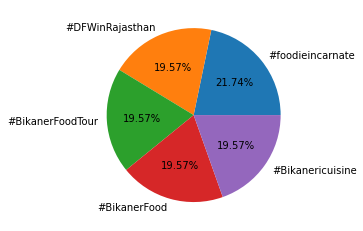

In [20]:
plt.pie(list(sorted_d.values())[0:5],labels=list(sorted_d.keys())[0:5],autopct='%.2f%%')
plt.show()

## Finding out the likes of the top 10 posts of the 5 handles obtained earlier.

In [21]:
likes = []
for user in top5:
    driver.find_element_by_class_name('TqC_a').click()
    driver.find_element_by_class_name('XTCLo ').send_keys(user)
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class,"-qQT3")]//div[contains(@class,"_7UhW9")]/div/div')))
    driver.find_element_by_xpath('//div[contains(@class,"fuqBx")]/div').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,'Nnq7C')))
    driver.find_element_by_xpath('//div[contains(@class,"Nnq7C")]/div').click() # Recent Post
    count = 10 # post Counter
    num_likes = 0
    while count>0:
        try:
            time.sleep(3)
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//section[contains(@class,"ltpMr")]//div[contains(@class,"QBdPU")]')))
            ## post has been opened , likes has to be scrapped
            try: # for image
                l = driver.find_element_by_xpath('//div[contains(@class,"eo2As")]/section[2]/div/div/a/span').text
                l = int(''.join(l.split(',')))
#                 print(count,'-','Image',l)
                num_likes += l
                driver.find_element_by_xpath('//div[contains(@class,"DdSX2")]/a[contains(@class,"coreSpriteRightPaginationArrow")]').click() # next post
                count -= 1
            except NoSuchElementException: # for video or igtv
                driver.find_element_by_class_name('vcOH2').click()
                l = driver.find_element_by_xpath('//div[contains(@class,"vJRqr")]/span').text # for video
                l = int(''.join(l.split(',')))
#                 print(count,'-','video',l)
                num_likes += l
                driver.find_element_by_class_name('QhbhU').click()
                driver.find_element_by_xpath('//div[contains(@class,"DdSX2")]/a[contains(@class,"coreSpriteRightPaginationArrow")]').click() # next post
                count -= 1
        except NoSuchElementException:
            print('this')
            break
    driver.find_element_by_xpath('//div[contains(@class,"_2dDPU")]/div[3]').click()
    likes.append(num_likes)

## printing the number of likes on the top 10 posts of top5 handles

In [22]:
print(likes)

[472280, 223181, 130138, 156850, 8271]


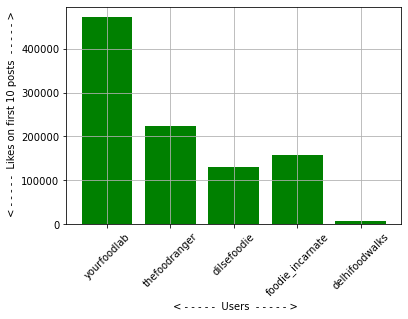

In [23]:
plt.bar(top5,likes,color='g')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel(' < - - - - -  Users  - - - - - >')
plt.ylabel(' < - - - - -  Likes on first 10 posts  - - - - - >')
plt.show()

## Calculating the average likes for a handles

In [24]:
avg_likes = np.array(likes)/10
print(avg_likes)

[47228.  22318.1 13013.8 15685.    827.1]


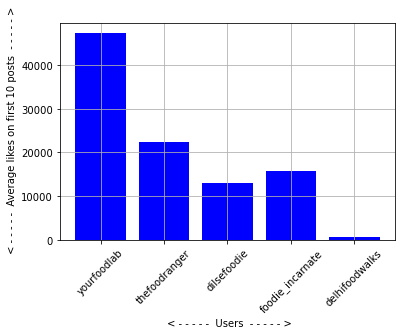

In [25]:
plt.bar(top5,avg_likes,color='b')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel(' < - - - - -  Users  - - - - - >')
plt.ylabel(' < - - - - -  Average likes on first 10 posts  - - - - - >')
plt.show()

## Dividing the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [26]:
ratio = np.array(top5_followers)/avg_likes
print(ratio)

[ 33.87820784  43.37286776  57.2469225   17.66018489 168.05706686]


## Creating a bar graph to depict the above obtained information.

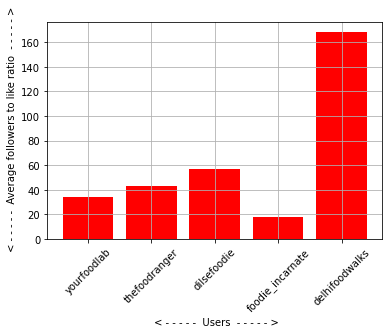

In [27]:
plt.bar(top5,ratio,color='r')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel(' < - - - - -  Users  - - - - - >')
plt.ylabel(' < - - - - -  Average followers to like ratio  - - - - - >')
plt.show()